In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
users=pd.read_csv("users.csv")

NameError: name 'pd' is not defined

In [ ]:
users.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,12,19000,0
1,15810944,Male,11,20000,0
2,15668575,Female,1,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,10,76000,0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          99 non-null     int64 
 1   Gender           99 non-null     object
 2   Age              99 non-null     int64 
 3   EstimatedSalary  99 non-null     int64 
 4   Purchased        99 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [ ]:
users

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,12,19000,0
1,15810944,Male,11,20000,0
2,15668575,Female,1,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,10,76000,0
...,...,...,...,...,...
94,15786993,Female,45,83000,0
95,15709441,Female,35,44000,0
96,15710257,Female,4,25000,0
97,15582492,Male,5,123000,1


In [ ]:
users.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
users.describe()

,User ID,Age,EstimatedSalary,Purchased
count,9.900000e+01,99.000000,99.000000,99.000000
mean,1.569127e+07,10.737374,57616.161616,0.191919
std,7.057936e+04,14.913072,33344.126268,0.395814
min,1.557077e+07,1.000000,15000.000000,0.000000
25%,1.563272e+07,1.000000,27000.000000,0.000000
50%,1.569483e+07,4.000000,52000.000000,0.000000
75%,1.574553e+07,10.500000,81500.000000,0.000000
max,1.581400e+07,64.000000,150000.000000,1.000000


In [ ]:
users.min()

User ID            15570769
Gender               Female
Age                       1
EstimatedSalary       15000
Purchased                 0
dtype: object

In [ ]:
users["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
X = users.drop(columns=["User ID", "Purchased"])  # Exclude the 'User ID' and 'Purchased' columns
y = users["Purchased"]

In [ ]:
X

,Gender,Age,EstimatedSalary
0,Male,12,19000
1,Male,11,20000
2,Female,1,43000
3,Female,27,57000
4,Male,10,76000
...,...,...,...
94,Female,45,83000
95,Female,35,44000
96,Female,4,25000
97,Male,5,123000


In [ ]:
users_encoded=pd.get_dummies(users[X])


ValueError: Boolean array expected for the condition, not object

In [ ]:
users_encoded.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male'], dtype='object')

In [ ]:
users_encoded

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,12,19000,False,True
1,15810944,11,20000,False,True
2,15668575,1,43000,True,False
3,15603246,27,57000,True,False
4,15804002,10,76000,False,True
...,...,...,...,...,...
94,15786993,45,83000,True,False
95,15709441,35,44000,True,False
96,15710257,4,25000,True,False
97,15582492,5,123000,False,True


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test ,y_train ,y_test = train_test_split(users_encoded ,y,test_size=15,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy' ,random_state=1)

model.fit(X_train ,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
train_predictions = model.predict(X_train)

test_predictions = model.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

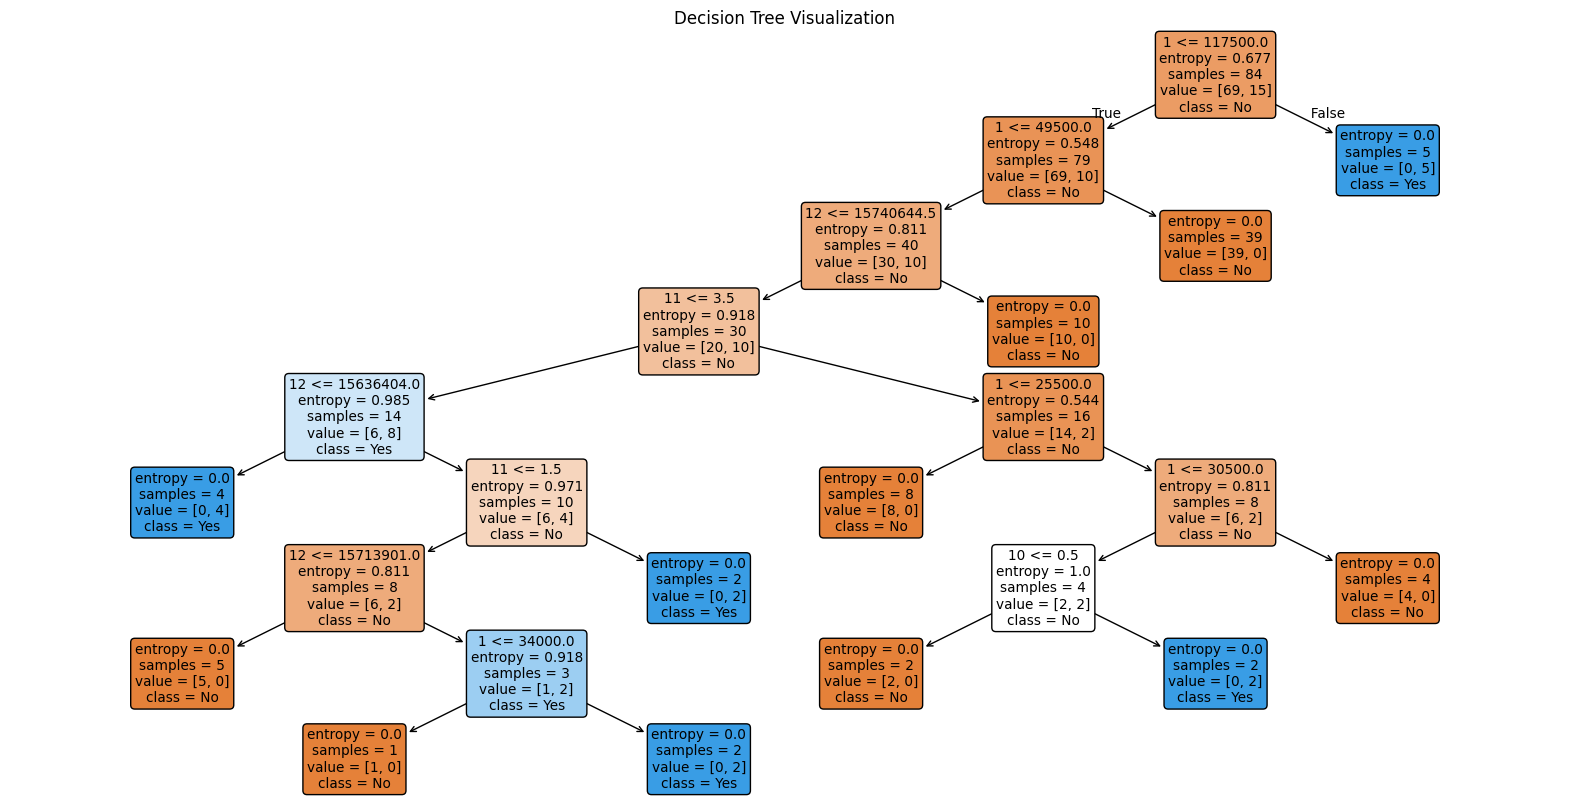

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,
    rounded=True,
    class_names=["No", "Yes"],  # Target classes
    feature_names=X.Age
)
plt.title("Decision Tree Visualization")
plt.show()

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.67      0.40      0.50         5

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20



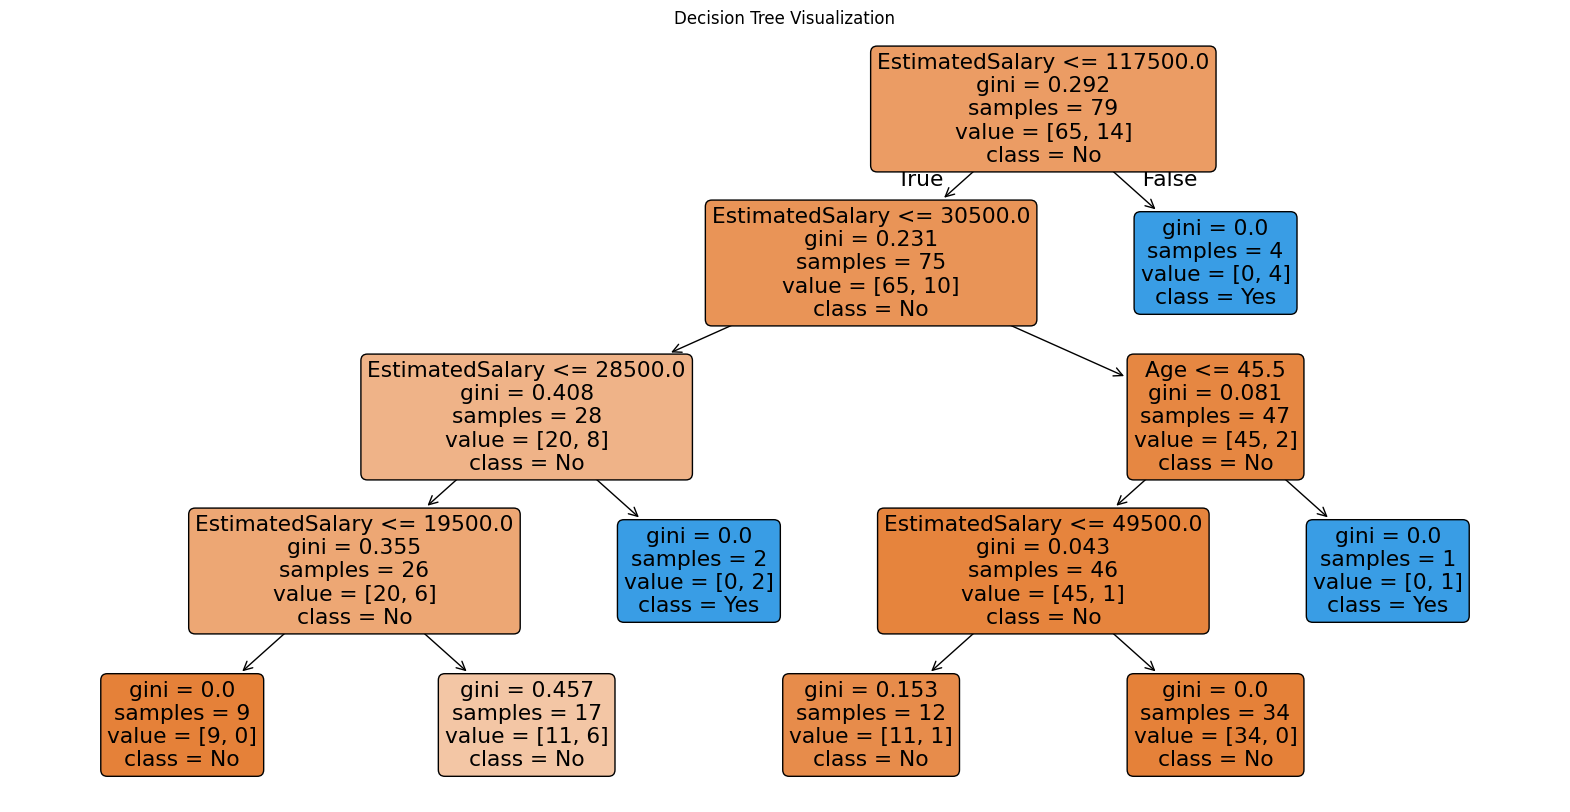

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset
file_path = "users.csv"  # Change this if your CSV file is located elsewhere
df = pd.read_csv(file_path)

# 2. Encode the 'Gender' column
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  # Male -> 1, Female -> 0

# 3. Define features (X) and target (y)
X = df.drop(columns=["User ID", "Purchased"])  # Exclude the 'User ID' and 'Purchased' columns
y = df["Purchased"]

# 4. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train a Decision Tree classifier
model = DecisionTreeClassifier(
    criterion="gini",  # or "entropy"
    max_depth=4,       # adjust depth as needed
    random_state=42
)
model.fit(X_train, y_train)

# 6. Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# 7. Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,
    rounded=True,
    class_names=["No", "Yes"],  # Target classes
    feature_names=X.columns
)
plt.title("Decision Tree Visualization")
plt.show()
